In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from skimage.io import imread
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [28]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [2]:
def calculate_iou(output, target):
    output = torch.sigmoid(output)
    output = (output > 0.5).float()
    
    intersection = (output * target).sum()
    union = output.sum() + target.sum() - intersection

    iou = intersection / (union + 1e-6)  # Adding a small value to avoid division by zero
    return iou

In [5]:
test_df = pd.read_csv("data/test_membrane_dataset.csv")
test_df = test_df.reset_index()

In [15]:
def get_path(raw):
    return "data/output_images/"+raw.split("/")[-1]

In [16]:
test_df["predict"] = test_df["raw"].apply(get_path)

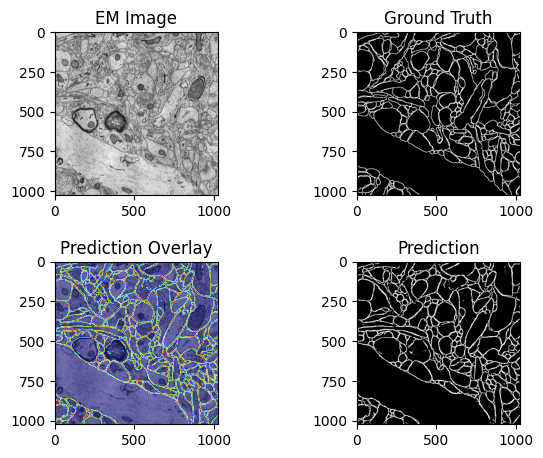

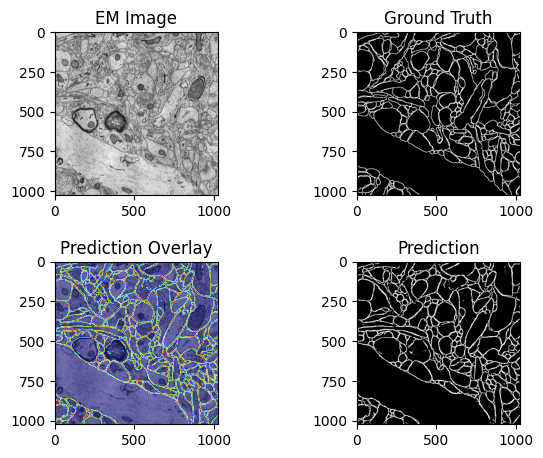

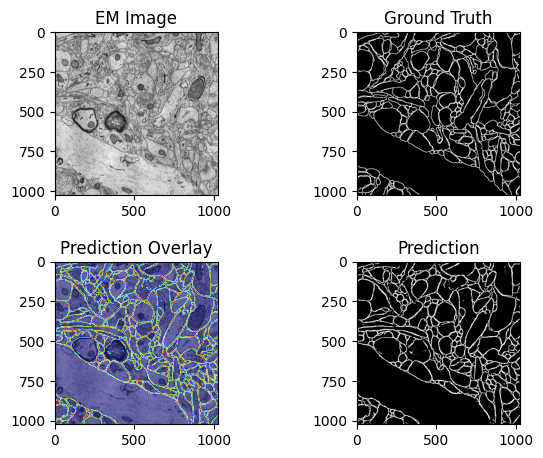

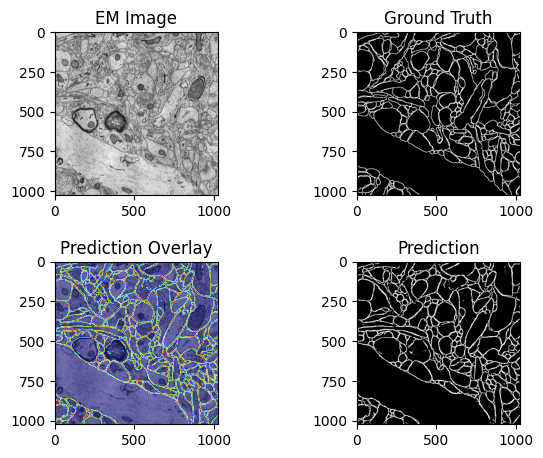

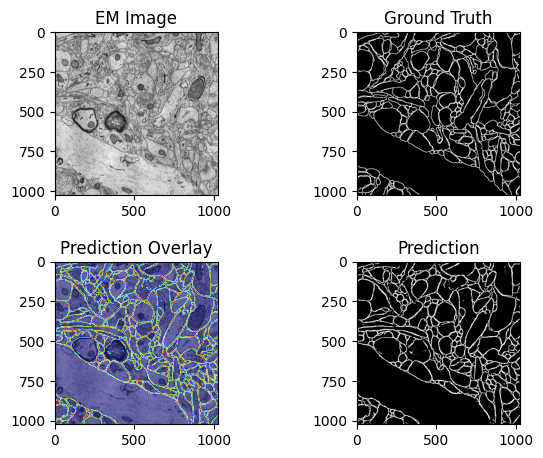

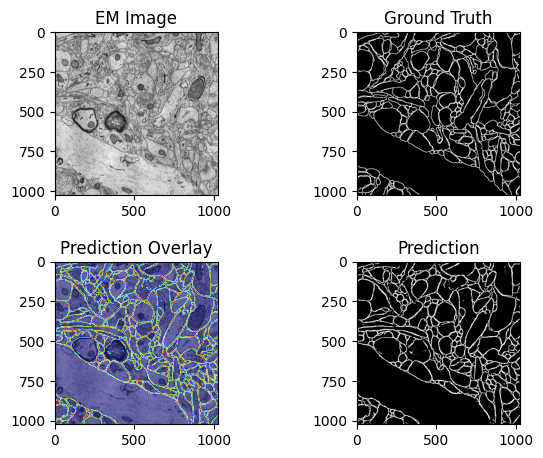

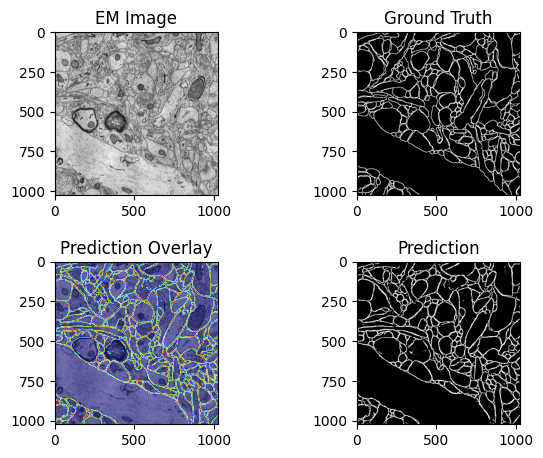

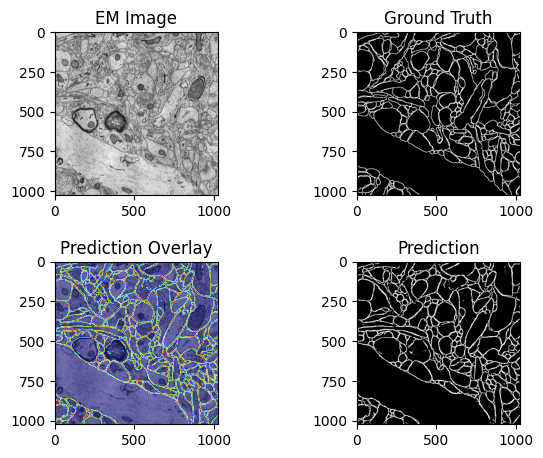

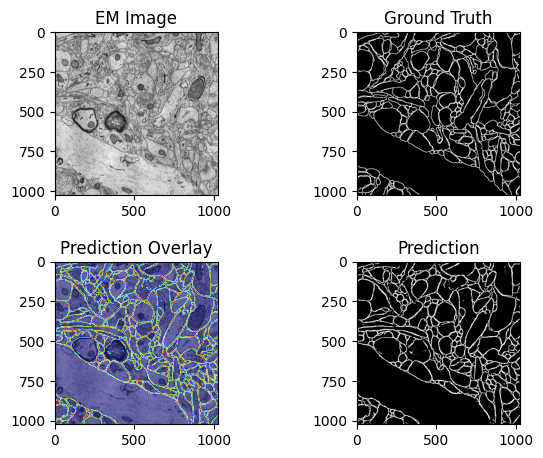

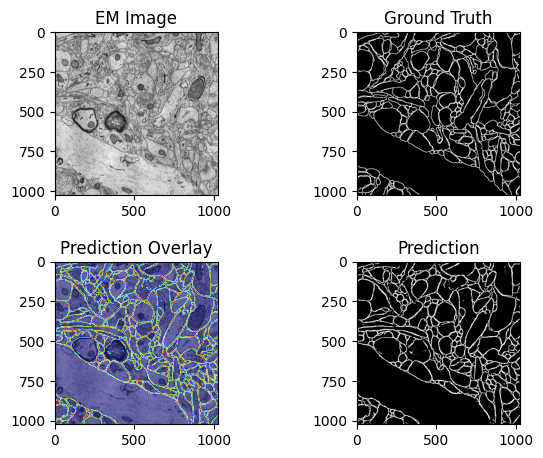

In [29]:
for i in range(10):
    raw = imread(test_df["raw"][0])
    label = imread(test_df["label"][0])
    pred = imread(test_df["predict"][0])

    fig = plt.figure()
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)

    ax1.title.set_text('EM Image')
    ax2.title.set_text('Ground Truth')
    ax3.title.set_text('Prediction Overlay')
    ax4.title.set_text('Prediction')

    ax1.imshow(raw, cmap='gray')
    ax2.imshow(label, cmap='gray')
    ax3.imshow(raw, cmap='gray')
    ax3.imshow(pred, cmap='jet', alpha=0.5)
    ax4.imshow(pred, cmap='gray')

    fig.tight_layout(pad=1.5)

    plt.show()
